In [14]:
# Set-up
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
import scipy.io
from statsmodels.stats.multitest import multipletests
from scipy import stats

In [2]:
# Figure saving options
flag_savefigs = False

# Font type
mpl.rcParams['font.family'] = 'Helvetica'
# Font size: 24, 32
fontsize_axis_ticks = 28
fontsize_axis_labels = 34

axis_thickness = 2

figures_dir = '/home/niia/Documents/Github/Respiroception_VBQ/figures/revision/'


## Compare RRST variables for participants excluded based on MPMs, compared to those included in final sample


### 1. Based on full RRST dataset and 'subset' dataset (note: here subset also includes RRST QA based exclusions)

In [5]:
# Load RRST data, full and after MPM exclusions
rrst_full_fpath = '/home/niia/Documents/Github/Respiroception_VBQ/data/rrst_behav_data_full.csv'
rrst_mpmexcl_fpath = '/home/niia/Documents/Github/Respiroception_VBQ/data/rrst_behav_data_vbq_subset.csv'

# Read the files
rrst_full_data = pd.read_csv(rrst_full_fpath)
rrst_subset_data = pd.read_csv(rrst_mpmexcl_fpath)

# Take a look at the columns
print(rrst_full_data.columns)
print(rrst_subset_data.columns)

Index(['id', 'psi_thresh', 'psi_slope', 'psi_acc', 'psi_dizzy',
       'psi_breathless', 'psi_asthma', 'displeasure1', 'displeasure2',
       'displeasure3', 'displeasure4', 'displeasure5', 'displeasure6',
       'displeasure7', 'displeasure8', 'displeasure9', 'displeasure10',
       'location', 'meanConf', 'dP', 'mRatio', 'aROC', 'criterion', 'meta_dP',
       'mDiff', 'meanDispRating', 'outlier', 'ind_esti_int', 'ind_esti_slope',
       'real_intercept_ind', 'real_slope_ind', 'hier_intercept', 'hier_slope',
       'hier_guess', 'hier_lapse', 'gender', 'age', 'bmi', 'handedness'],
      dtype='object')
Index(['id', 'psi_thresh', 'psi_slope', 'psi_acc', 'psi_dizzy',
       'psi_breathless', 'psi_asthma', 'displeasure1', 'displeasure2',
       'displeasure3', 'displeasure4', 'displeasure5', 'displeasure6',
       'displeasure7', 'displeasure8', 'displeasure9', 'displeasure10',
       'location', 'meanConf', 'dP', 'mRatio', 'aROC', 'criterion', 'meta_dP',
       'mDiff', 'meanDispRating'

In [6]:
# Identify the IDs in rrst_subset_data
subset_ids = rrst_subset_data['id']

# Filter rrst_full_data to exclude those IDs
result_df = rrst_full_data[~rrst_full_data['id'].isin(subset_ids)]

# Display the result
print(result_df)

      id  psi_thresh  psi_slope   psi_acc   psi_dizzy  psi_breathless  \
2    266   13.301316   9.764969  0.683333   22.395833        0.000000   
3    267   11.883808   1.689063  0.816667  100.000000       87.760417   
8    272   16.997194   8.556644  0.583333    5.989583       12.760417   
16   281   16.999570   9.736461  0.525000   26.302083       31.510417   
18   283   16.999943  10.246879  0.475000   62.760417        0.781250   
..   ...         ...        ...       ...         ...             ...   
290  608   16.999600   9.979207  0.516667   63.541667        0.000000   
294  612   12.622442   1.462010  0.800000   42.447917       18.229167   
295  613   12.473251   1.274910  0.808333   36.718750        0.000000   
301  620   16.999743  10.244693  0.475000   52.864583        6.510417   
304  623   11.493334   1.014685  0.833333    8.072917        0.000000   

     psi_asthma  displeasure1  displeasure2  displeasure3  ...  \
2           0.0     25.260417     18.229167     14.843750

## Calculate the mean and standard deviation for the regressors used

In [7]:
param_calc = 'psi_slope'
scale_f = np.divide(100,17)

# Calculate the mean
mean_param = rrst_subset_data[param_calc].mean() 
# Calculate the standard deviation
std_dev_param = rrst_subset_data[param_calc].std() 

# Print the results
print(f"Mean: {mean_param}")
print(f"Standard Deviation: {std_dev_param}")

Mean: 2.125842995169082
Standard Deviation: 1.0380863877742774


### 2. Based only on participants marked for MPM QC based exclusion 
This is probably the right way to do it. Confirm the numbers of subjects with those listed for exclusion steps in the paper. 

In [8]:
mpm_exclusions_fpath = '/home/niia/Documents/Github/VMP_pipelines/code/mpm/qa/mpm_qc_exclusions.csv'
# Read the TSV files
mpm_exclusions_ids = pd.read_csv(mpm_exclusions_fpath)

In [ ]:
# Merge the DataFrames on 'id' with an inner join
#rrst_mpm_excl_only = rrst_full_data.merge(mpm_exclusions_ids, on='id', how='inner')

In [9]:
# Split RRST into included and excluded
# Create a set of ids from mpm_exclusions_ids for faster lookup
exclusion_ids = set(mpm_exclusions_ids['id'])

# Filter rrst_full_data to include only rows with ids in exclusion_ids
df_excluded  = rrst_full_data[rrst_full_data['id'].isin(exclusion_ids)]

# Filter rrst_full_data to include only rows with ids not in exclusion_ids
df_included = rrst_full_data[~rrst_full_data['id'].isin(exclusion_ids)]

## Make some plots comparing the two samples (included vs excluded) & calculate statistics

### Threshold

/tmp/ipykernel_1462824/133802507.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded['psi_thresh'] = df_excluded['psi_thresh'] * scale_f
/tmp/ipykernel_1462824/133802507.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_included['psi_thresh'] = df_included['psi_thresh'] * scale_f


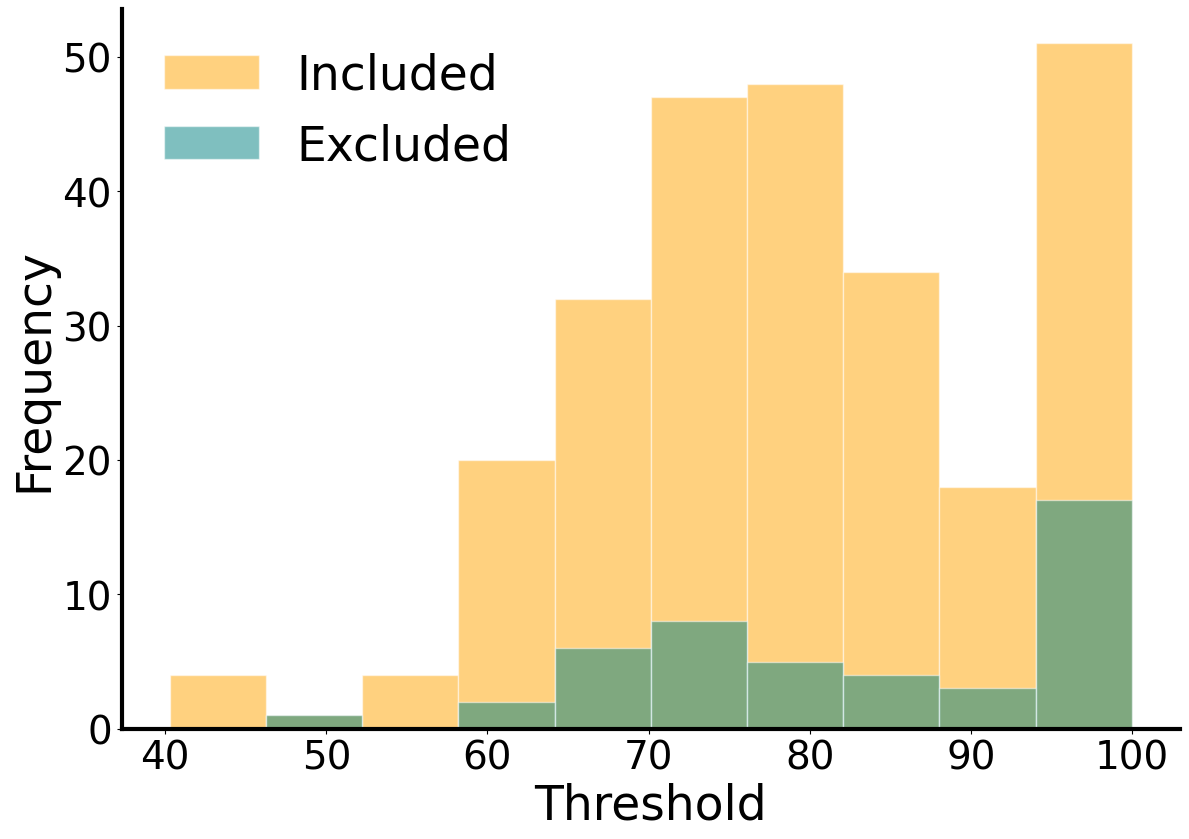

In [22]:
fig_filename = 'rrst_exclusions_control_thresh_hist_sup.png'
fig, ax = plt.subplots(figsize=(12, 8.5))

# Scale thresh
scale_f = np.divide(100,17)
df_excluded['psi_thresh'] = df_excluded['psi_thresh'] * scale_f
df_included['psi_thresh'] = df_included['psi_thresh'] * scale_f

# Determine the common range for bins
min_val = min(df_excluded['psi_thresh'].min(), df_included['psi_thresh'].min())
max_val = max(df_excluded['psi_thresh'].max(), df_included['psi_thresh'].max())

# Create the bin edges
bins = np.linspace(min_val, max_val, 11)  # 10 bins

# Create the histograms for both included and excluded psi_thresh values using the same bins
plt.hist(df_included['psi_thresh'], bins=bins, color='orange', edgecolor='white', alpha=0.5, label='Included')
plt.hist(df_excluded['psi_thresh'], bins=bins, color='teal', edgecolor='white', alpha=0.5, label='Excluded')

# Set labels and ticks
plt.xlabel('Threshold', fontsize=fontsize_axis_labels)
plt.ylabel('Frequency', fontsize=fontsize_axis_labels)
plt.xticks(fontsize=fontsize_axis_ticks)
plt.yticks(fontsize=fontsize_axis_ticks)

# Remove frame
ax = plt.gca()  # gca stands for 'get current axis'

# Increase the thickness of the axis
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(3.0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend to distinguish between the two histograms
plt.legend(fontsize=fontsize_axis_labels, frameon=False)

# Adjust layout to prevent clipping at the bottom
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the bottom margin as needed (0.95 leaves 5% space at the bottom)


if flag_savefigs:
    # Save the figure with a specified size and resolution
    fig_filepath = f'{figures_dir}{fig_filename}'
    plt.savefig(fig_filepath, dpi=300)

plt.show()


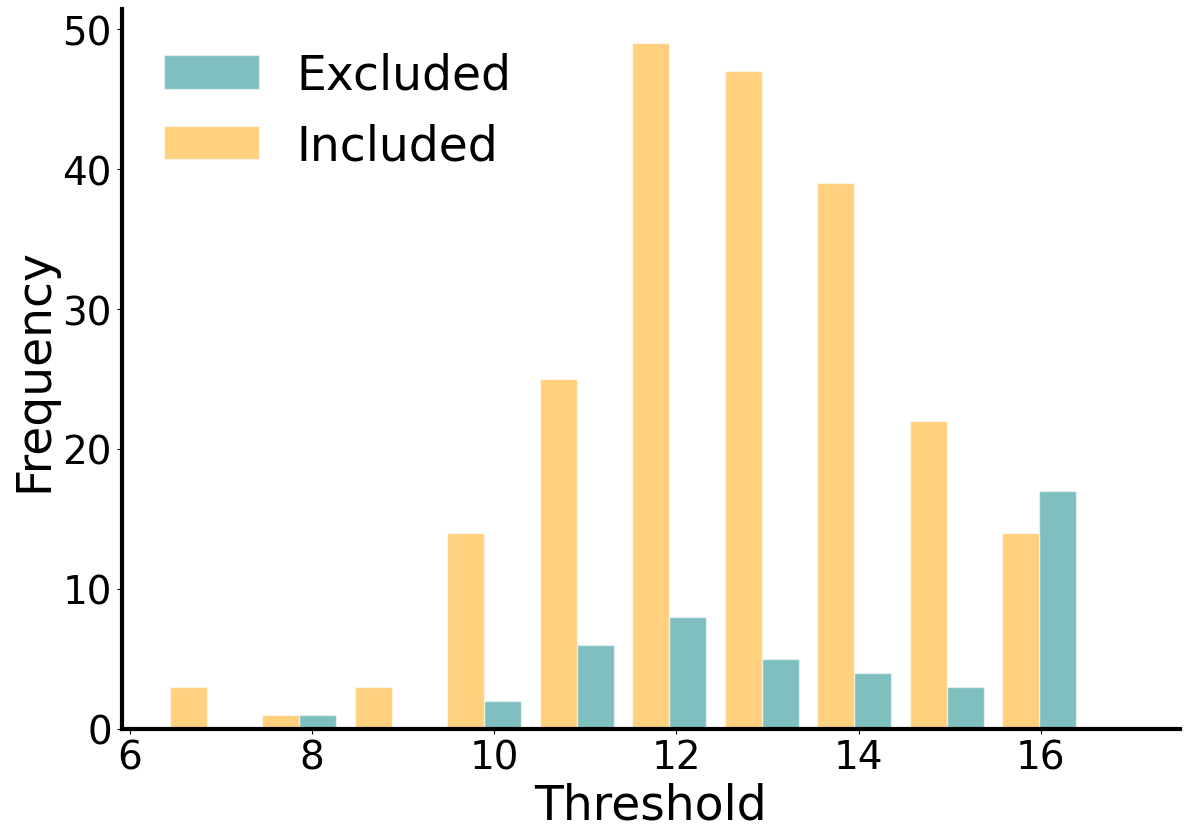

In [17]:
fig_filename = 'rrst_exclusions_control_thresh_hist.png'
fig, ax = plt.subplots(figsize=(12, 8.5))

# Determine the common range for bins
min_val = min(df_excluded['psi_thresh'].min(), df_included['psi_thresh'].min())
max_val = max(df_excluded['psi_thresh'].max(), df_included['psi_thresh'].max())

# Create the bin edges
bins = np.linspace(min_val, max_val, 11)  # 10 bins

# Calculate the width of each bar
width = (bins[1] - bins[0]) / 2 * 0.8

# Create the histograms for both included and excluded psi_thresh values using the same bins
excluded_hist = ax.hist(df_excluded['psi_thresh'], bins=bins, color='teal', edgecolor='white', alpha=0.5, label='Excluded', width=width, align='mid')
included_hist = ax.hist(df_included['psi_thresh'], bins=bins - width, color='orange', edgecolor='white', alpha=0.5, label='Included', width=width, align='mid')

# Set labels and ticks
plt.xlabel('Threshold', fontsize=fontsize_axis_labels)
plt.ylabel('Frequency', fontsize=fontsize_axis_labels)
plt.xticks(fontsize=fontsize_axis_ticks)
plt.yticks(fontsize=fontsize_axis_ticks)

# Remove frame
ax = plt.gca()  # gca stands for 'get current axis'

# Increase the thickness of the axis
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(3.0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend to distinguish between the two histograms
plt.legend(fontsize=fontsize_axis_labels, frameon=False)

# Adjust layout to prevent clipping at the bottom
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the bottom margin as needed (0.95 leaves 5% space at the bottom)

if flag_savefigs:
    # Save the figure with a specified size and resolution
    fig_filepath = f'{figures_dir}{fig_filename}'
    plt.savefig(fig_filepath, dpi=300)

plt.show()


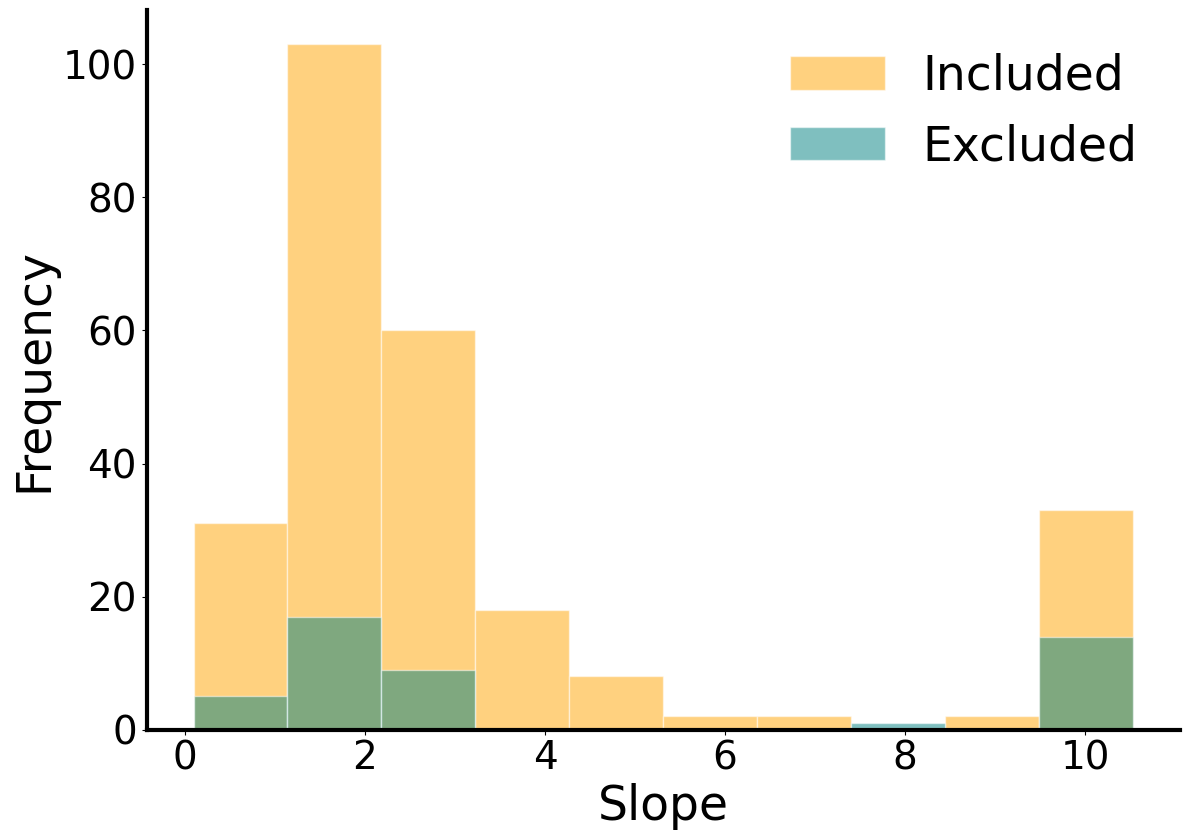

In [18]:

fig_filename = 'rrst_exclusions_control_slope_hist_sup.png'
fig, ax = plt.subplots(figsize=(12, 8.5))

# Determine the common range for bins
min_val = min(df_excluded['psi_slope'].min(), df_included['psi_slope'].min())
max_val = max(df_excluded['psi_slope'].max(), df_included['psi_slope'].max())

# Create the bin edges
bins = np.linspace(min_val, max_val, 11)  # 10 bins

# Create the histograms for both included and excluded psi_thresh values using the same bins
plt.hist(df_included['psi_slope'], bins=bins, color='orange', edgecolor='white', alpha=0.5, label='Included')
plt.hist(df_excluded['psi_slope'], bins=bins, color='teal', edgecolor='white', alpha=0.5, label='Excluded')

# Set labels and ticks
plt.xlabel('Slope', fontsize=fontsize_axis_labels)
plt.ylabel('Frequency', fontsize=fontsize_axis_labels)
plt.xticks(fontsize=fontsize_axis_ticks)
plt.yticks(fontsize=fontsize_axis_ticks)

# Remove frame
ax = plt.gca()  # gca stands for 'get current axis'

# Increase the thickness of the axis
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(3.0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend to distinguish between the two histograms
plt.legend(fontsize=fontsize_axis_labels, frameon=False)

# Adjust layout to prevent clipping at the bottom
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the bottom margin as needed (0.95 leaves 5% space at the bottom)


if flag_savefigs:
    # Save the figure with a specified size and resolution
    fig_filepath = f'{figures_dir}{fig_filename}'
    plt.savefig(fig_filepath, dpi=300)

plt.show()

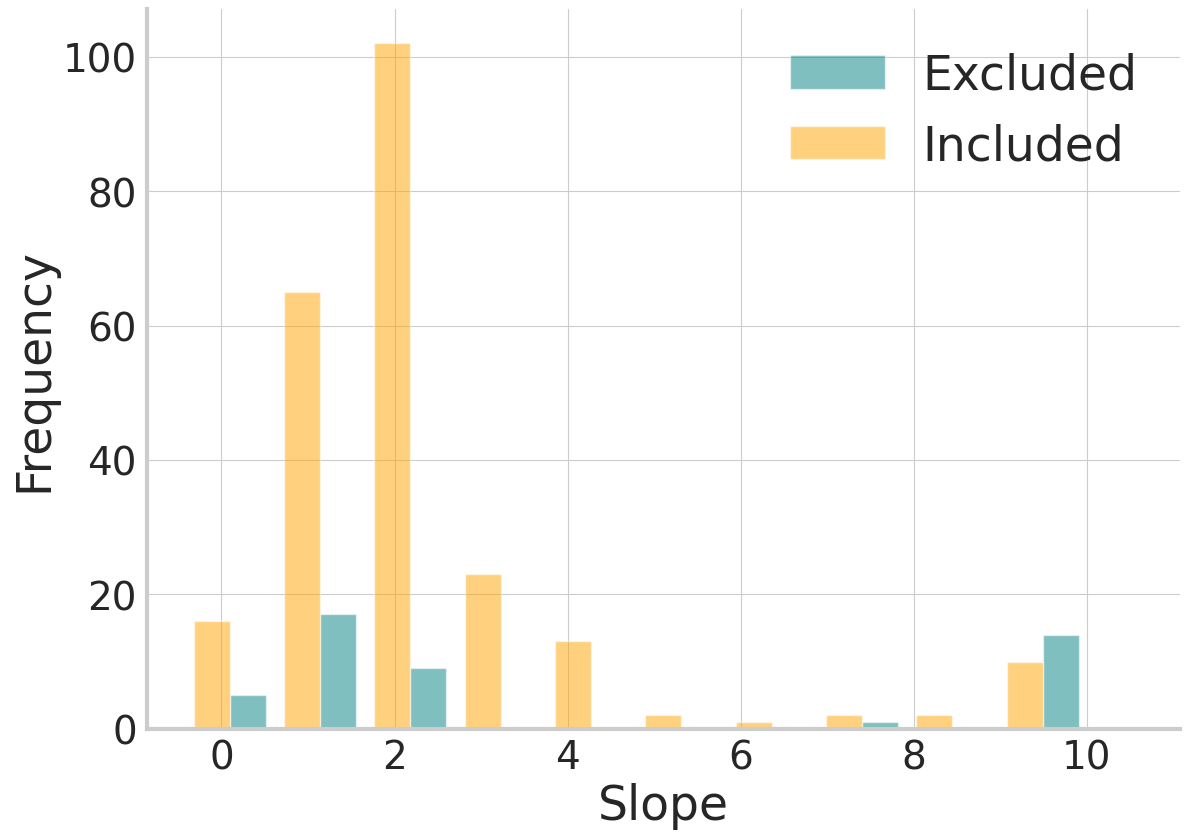

In [43]:
fig_filename = 'rrst_exclusions_control_slope_hist.png'
fig, ax = plt.subplots(figsize=(12, 8.5))

# Determine the common range for bins
min_val = min(df_excluded['psi_slope'].min(), df_included['psi_slope'].min())
max_val = max(df_excluded['psi_slope'].max(), df_included['psi_slope'].max())

# Create the bin edges
bins = np.linspace(min_val, max_val, 11)  # 10 bins

# Calculate the width of each bar
width = (bins[1] - bins[0]) / 2 * 0.8

# Create the histograms for both included and excluded psi_thresh values using the same bins
excluded_hist = ax.hist(df_excluded['psi_slope'], bins=bins, color='teal', edgecolor='white', alpha=0.5, label='Excluded', width=width, align='mid')
included_hist = ax.hist(df_included['psi_slope'], bins=bins - width, color='orange', edgecolor='white', alpha=0.5, label='Included', width=width, align='mid')

# Set labels and ticks
plt.xlabel('Slope', fontsize=fontsize_axis_labels)
plt.ylabel('Frequency', fontsize=fontsize_axis_labels)
plt.xticks(fontsize=fontsize_axis_ticks)
plt.yticks(fontsize=fontsize_axis_ticks)

# Remove frame
ax = plt.gca()  # gca stands for 'get current axis'

# Increase the thickness of the axis
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(3.0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend to distinguish between the two histograms
plt.legend(fontsize=fontsize_axis_labels, frameon=False)

# Adjust layout to prevent clipping at the bottom
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the bottom margin as needed (0.95 leaves 5% space at the bottom)

if flag_savefigs:
    # Save the figure with a specified size and resolution
    fig_filepath = f'{figures_dir}{fig_filename}'
    plt.savefig(fig_filepath, dpi=300)

plt.show()


### Accuracy

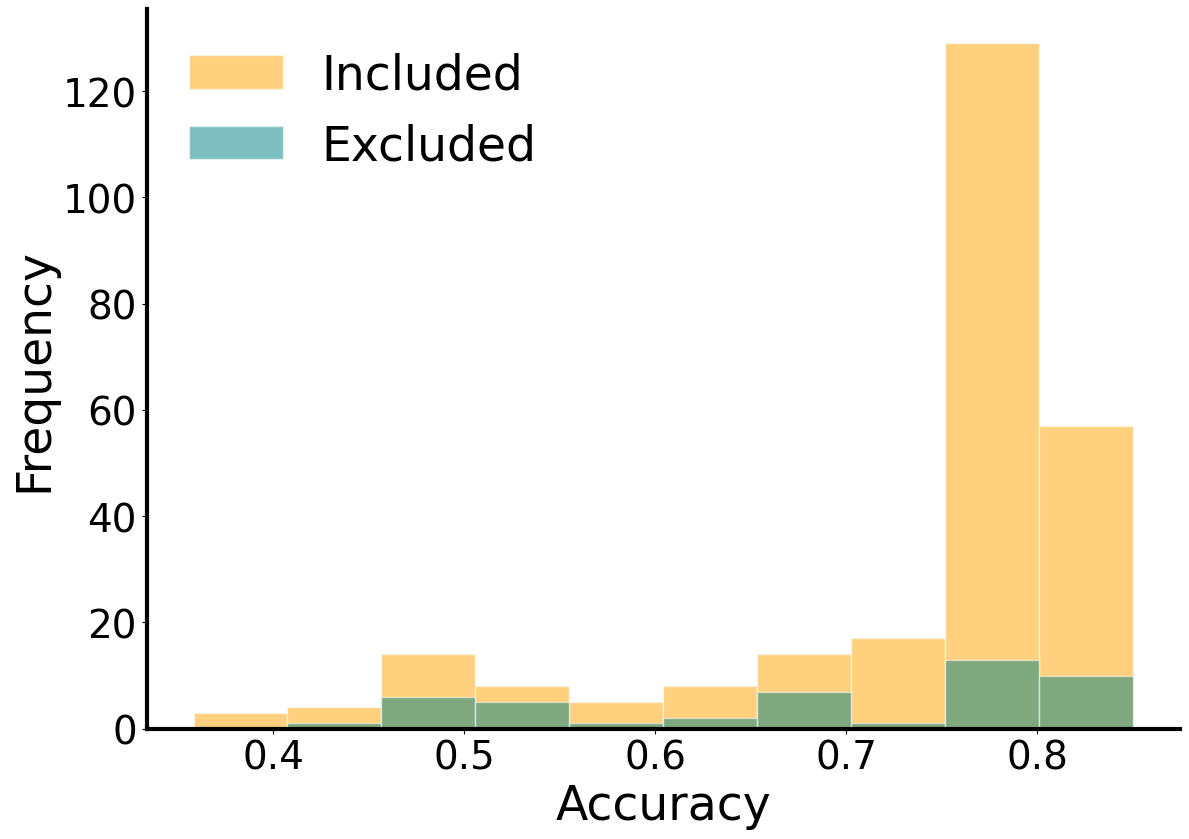

In [19]:
param_name = 'psi_acc'

fig_filename = 'rrst_exclusions_control_accuracy_hist_sup.png'
fig, ax = plt.subplots(figsize=(12, 8.5))

# Determine the common range for bins
min_val = min(df_excluded[param_name].min(), df_included[param_name].min())
max_val = max(df_excluded[param_name].max(), df_included[param_name].max())

# Create the bin edges
bins = np.linspace(min_val, max_val, 11)  # 10 bins

# Create the histograms for both included and excluded psi_thresh values using the same bins
plt.hist(df_included[param_name], bins=bins, color='orange', edgecolor='white', alpha=0.5, label='Included')
plt.hist(df_excluded[param_name], bins=bins, color='teal', edgecolor='white', alpha=0.5, label='Excluded')


# Set labels and ticks
plt.xlabel('Accuracy', fontsize=fontsize_axis_labels)
plt.ylabel('Frequency', fontsize=fontsize_axis_labels)
plt.xticks(fontsize=fontsize_axis_ticks)
plt.yticks(fontsize=fontsize_axis_ticks)

# Remove frame
ax = plt.gca()  # gca stands for 'get current axis'

# Increase the thickness of the axis
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(3.0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend to distinguish between the two histograms
plt.legend(fontsize=fontsize_axis_labels, frameon=False)

# Adjust layout to prevent clipping at the bottom
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the bottom margin as needed (0.95 leaves 5% space at the bottom)


if flag_savefigs:
    # Save the figure with a specified size and resolution
    fig_filepath = f'{figures_dir}{fig_filename}'
    plt.savefig(fig_filepath, dpi=300)

plt.show()

### Confidence Bias

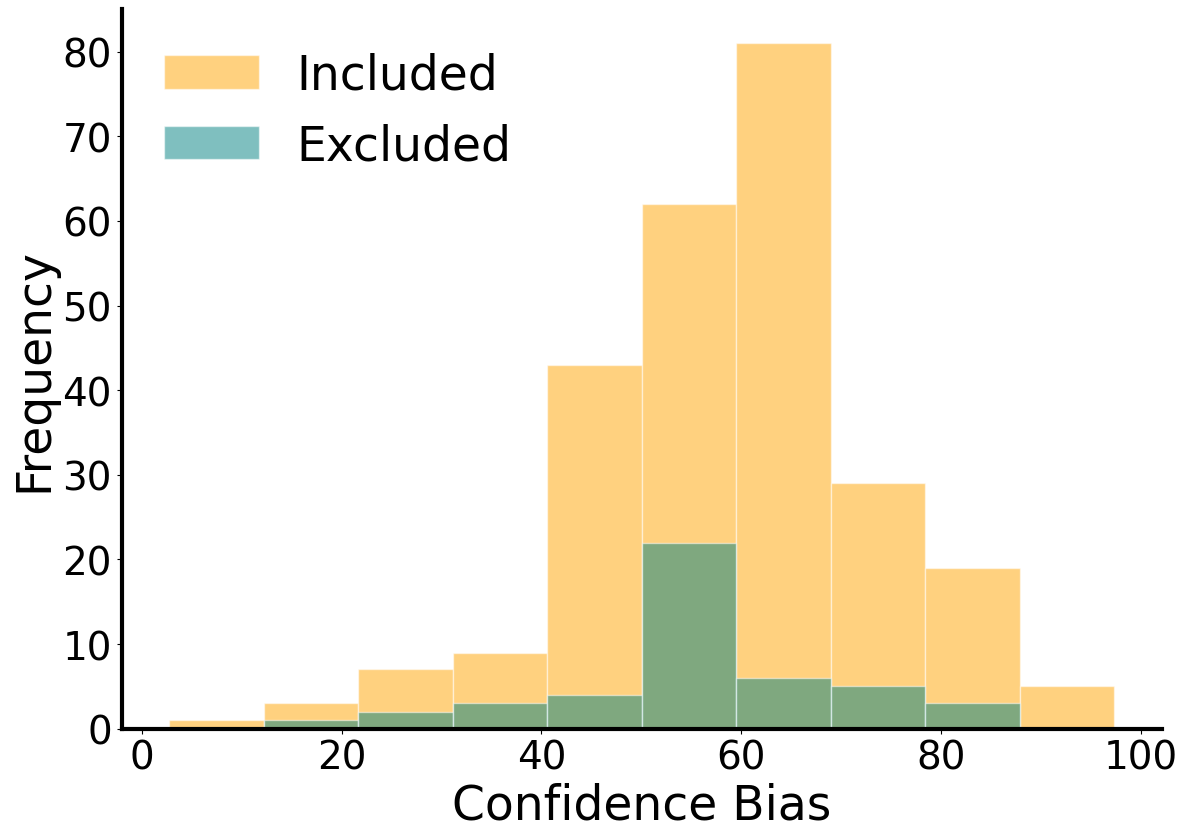

In [20]:
param_name = 'meanConf'

fig_filename = 'rrst_exclusions_control_confBias_hist_sup.png'
fig, ax = plt.subplots(figsize=(12, 8.5))

# Determine the common range for bins
min_val = min(df_excluded[param_name].min(), df_included[param_name].min())
max_val = max(df_excluded[param_name].max(), df_included[param_name].max())

# Create the bin edges
bins = np.linspace(min_val, max_val, 11)  # 10 bins

# Create the histograms for both included and excluded psi_thresh values using the same bins
plt.hist(df_included[param_name], bins=bins, color='orange', edgecolor='white', alpha=0.5, label='Included')
plt.hist(df_excluded[param_name], bins=bins, color='teal', edgecolor='white', alpha=0.5, label='Excluded')


# Set labels and ticks
plt.xlabel('Confidence Bias', fontsize=fontsize_axis_labels)
plt.ylabel('Frequency', fontsize=fontsize_axis_labels)
plt.xticks(fontsize=fontsize_axis_ticks)
plt.yticks(fontsize=fontsize_axis_ticks)

# Remove frame
ax = plt.gca()  # gca stands for 'get current axis'

# Increase the thickness of the axis
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(3.0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend to distinguish between the two histograms
plt.legend(fontsize=fontsize_axis_labels, frameon=False)

# Adjust layout to prevent clipping at the bottom
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the bottom margin as needed (0.95 leaves 5% space at the bottom)


if flag_savefigs:
    # Save the figure with a specified size and resolution
    fig_filepath = f'{figures_dir}{fig_filename}'
    plt.savefig(fig_filepath, dpi=300)

plt.show()

### Metacognition

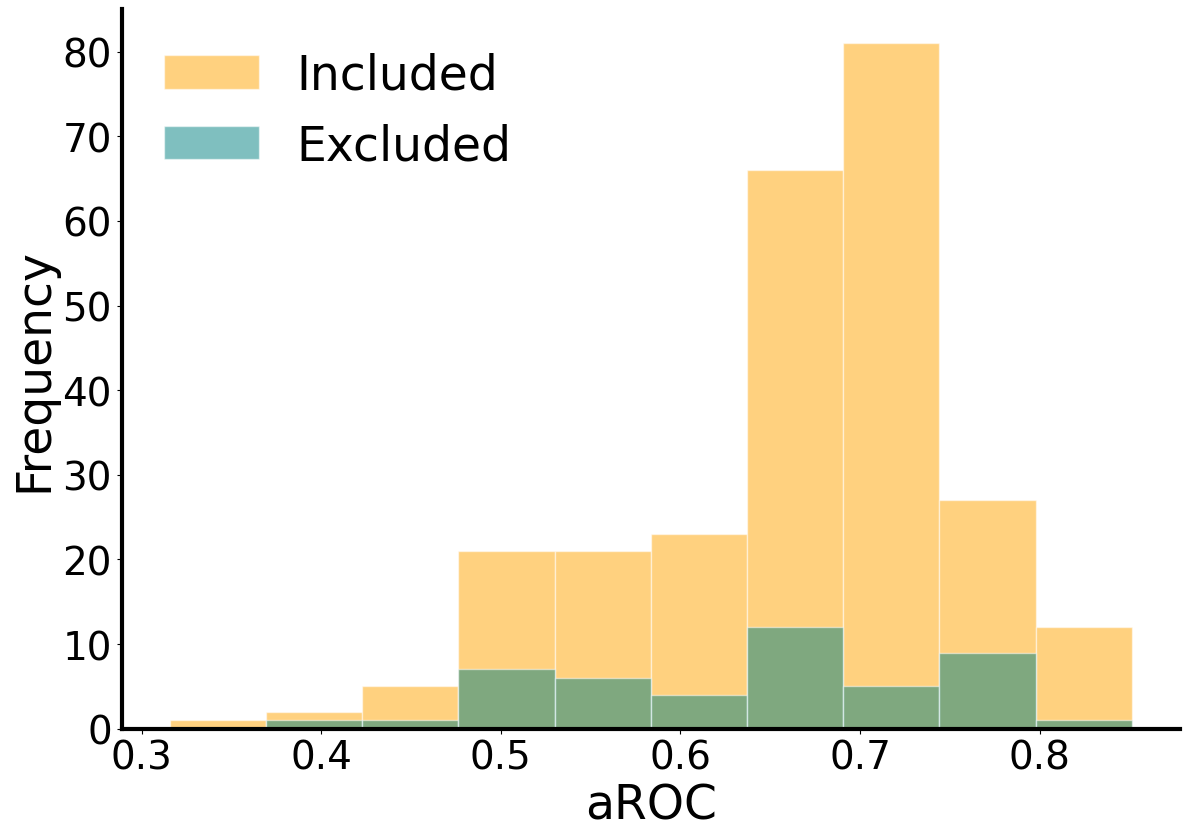

In [21]:
param_name = 'aROC'

fig_filename = 'rrst_exclusions_control_metacog_hist_sup.png'
fig, ax = plt.subplots(figsize=(12, 8.5))

# Determine the common range for bins
min_val = min(df_excluded[param_name].min(), df_included[param_name].min())
max_val = max(df_excluded[param_name].max(), df_included[param_name].max())

# Create the bin edges
bins = np.linspace(min_val, max_val, 11)  # 10 bins

# Create the histograms for both included and excluded psi_thresh values using the same bins
plt.hist(df_included[param_name], bins=bins, color='orange', edgecolor='white', alpha=0.5, label='Included')
plt.hist(df_excluded[param_name], bins=bins, color='teal', edgecolor='white', alpha=0.5, label='Excluded')


# Set labels and ticks
plt.xlabel('aROC', fontsize=fontsize_axis_labels)
plt.ylabel('Frequency', fontsize=fontsize_axis_labels)
plt.xticks(fontsize=fontsize_axis_ticks)
plt.yticks(fontsize=fontsize_axis_ticks)

# Remove frame
ax = plt.gca()  # gca stands for 'get current axis'

# Increase the thickness of the axis
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(3.0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend to distinguish between the two histograms
plt.legend(fontsize=fontsize_axis_labels, frameon=False)

# Adjust layout to prevent clipping at the bottom
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the bottom margin as needed (0.95 leaves 5% space at the bottom)


if flag_savefigs:
    # Save the figure with a specified size and resolution
    fig_filepath = f'{figures_dir}{fig_filename}'
    plt.savefig(fig_filepath, dpi=300)

plt.show()

## Full vs final VBQ participants (after all exclusions) - threshold

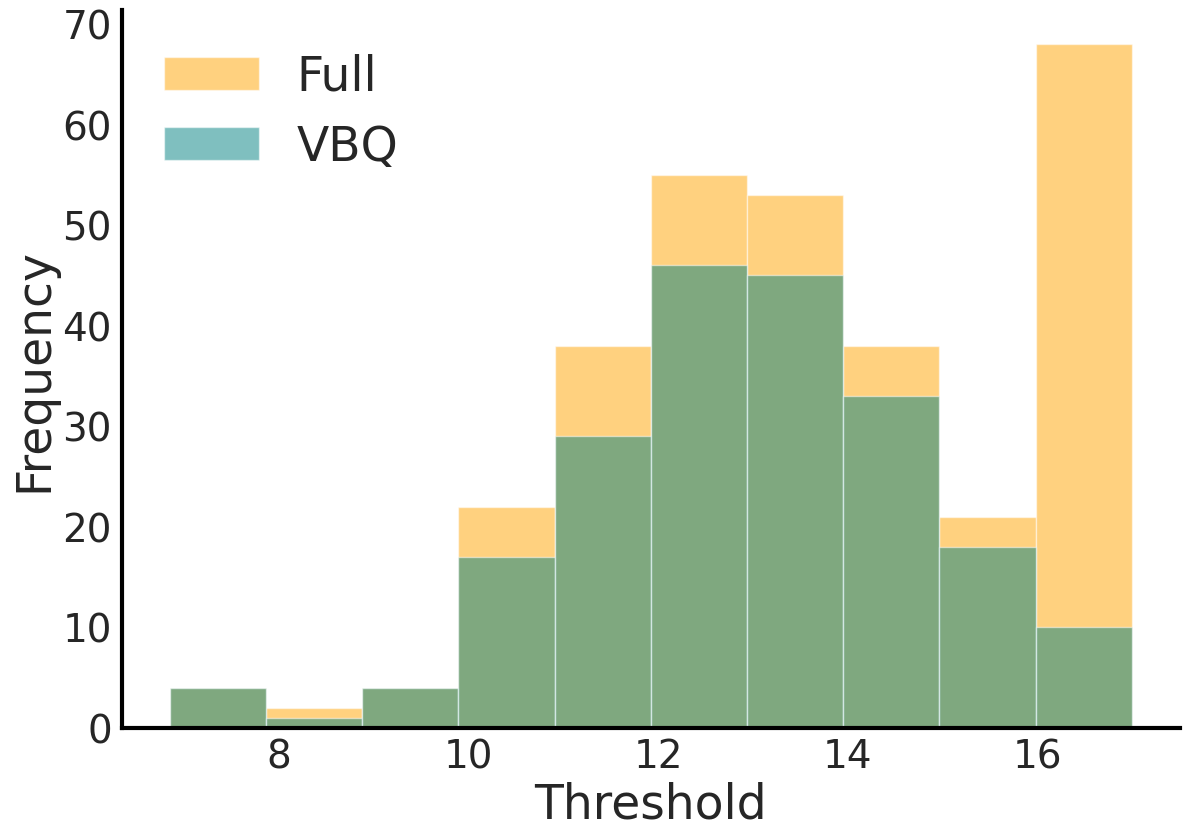

In [52]:
## Full vs final VBQ participants (after all exclusions) - threshold


fig_filename = 'rrst_exclusionsAll_control_thresh_hist_sup.png'
fig, ax = plt.subplots(figsize=(12, 8.5))

# Determine the common range for bins
min_val = min(rrst_full_data['psi_thresh'].min(), rrst_subset_data['psi_thresh'].min())
max_val = max(rrst_full_data['psi_thresh'].max(), rrst_subset_data['psi_thresh'].max())

# Create the bin edges
bins = np.linspace(min_val, max_val, 11)  # 10 bins

# Create the histograms for both included and excluded psi_thresh values using the same bins
plt.hist(rrst_full_data['psi_thresh'], bins=bins, color='orange', edgecolor='white', alpha=0.5, label='Full')
plt.hist(rrst_subset_data['psi_thresh'], bins=bins, color='teal', edgecolor='white', alpha=0.5, label='VBQ')


# Set labels and ticks
plt.xlabel('Threshold', fontsize=fontsize_axis_labels)
plt.ylabel('Frequency', fontsize=fontsize_axis_labels)
plt.xticks(fontsize=fontsize_axis_ticks)
plt.yticks(fontsize=fontsize_axis_ticks)

# Remove frame
ax = plt.gca() 
ax.grid(False)

# Increase the thickness of the axis
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(3.0)
    ax.spines[axis].set_color('black')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend to distinguish between the two histograms
plt.legend(fontsize=fontsize_axis_labels, frameon=False)

# Adjust layout to prevent clipping at the bottom
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the bottom margin as needed (0.95 leaves 5% space at the bottom)


if flag_savefigs:
    # Save the figure with a specified size and resolution
    fig_filepath = f'{figures_dir}{fig_filename}'
    plt.savefig(fig_filepath, dpi=300)

plt.show()

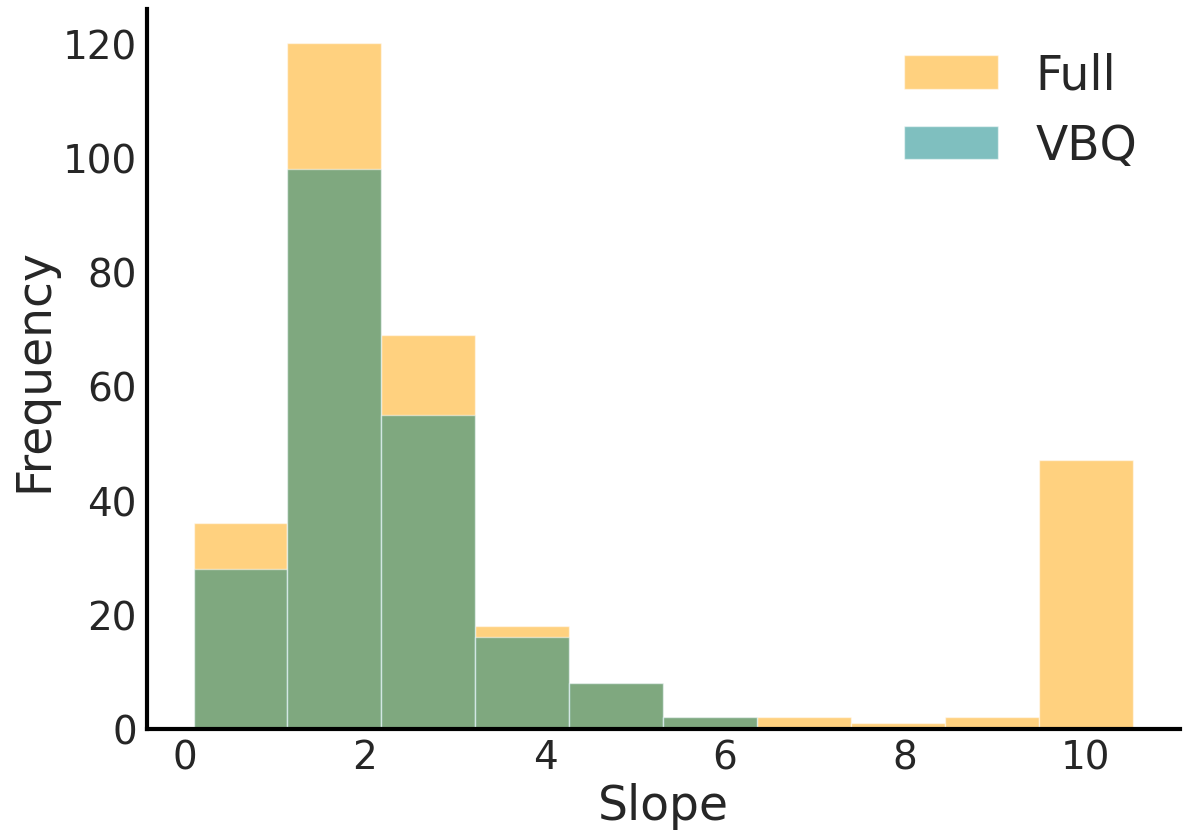

In [54]:
## Full vs final VBQ participants (after all exclusions) - slope

fig_filename = 'rrst_exclusionsAll_control_slope_hist_sup.png'
fig, ax = plt.subplots(figsize=(12, 8.5))

# Determine the common range for bins
min_val = min(rrst_full_data['psi_slope'].min(), rrst_subset_data['psi_slope'].min())
max_val = max(rrst_full_data['psi_slope'].max(), rrst_subset_data['psi_slope'].max())

# Create the bin edges
bins = np.linspace(min_val, max_val, 11)  # 10 bins

# Create the histograms for both included and excluded psi_slope values using the same bins
plt.hist(rrst_full_data['psi_slope'], bins=bins, color='orange', edgecolor='white', alpha=0.5, label='Full')
plt.hist(rrst_subset_data['psi_slope'], bins=bins, color='teal', edgecolor='white', alpha=0.5, label='VBQ')


# Set labels and ticks
plt.xlabel('Slope', fontsize=fontsize_axis_labels)
plt.ylabel('Frequency', fontsize=fontsize_axis_labels)
plt.xticks(fontsize=fontsize_axis_ticks)
plt.yticks(fontsize=fontsize_axis_ticks)

# Remove frame
ax = plt.gca()  # gca stands for 'get current axis'
ax.grid(False)

# Increase the thickness of the axis
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(3.0)
    ax.spines[axis].set_color('black')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend to distinguish between the two histograms
plt.legend(fontsize=fontsize_axis_labels, frameon=False)

# Adjust layout to prevent clipping at the bottom
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the bottom margin as needed (0.95 leaves 5% space at the bottom)


if flag_savefigs:
    # Save the figure with a specified size and resolution
    fig_filepath = f'{figures_dir}{fig_filename}'
    plt.savefig(fig_filepath, dpi=300)

plt.show()

## Gender effect on thresh / slope?

In [10]:
rrst_subset_data['psi_thresh'] = rrst_subset_data['psi_thresh'] * scale_f

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


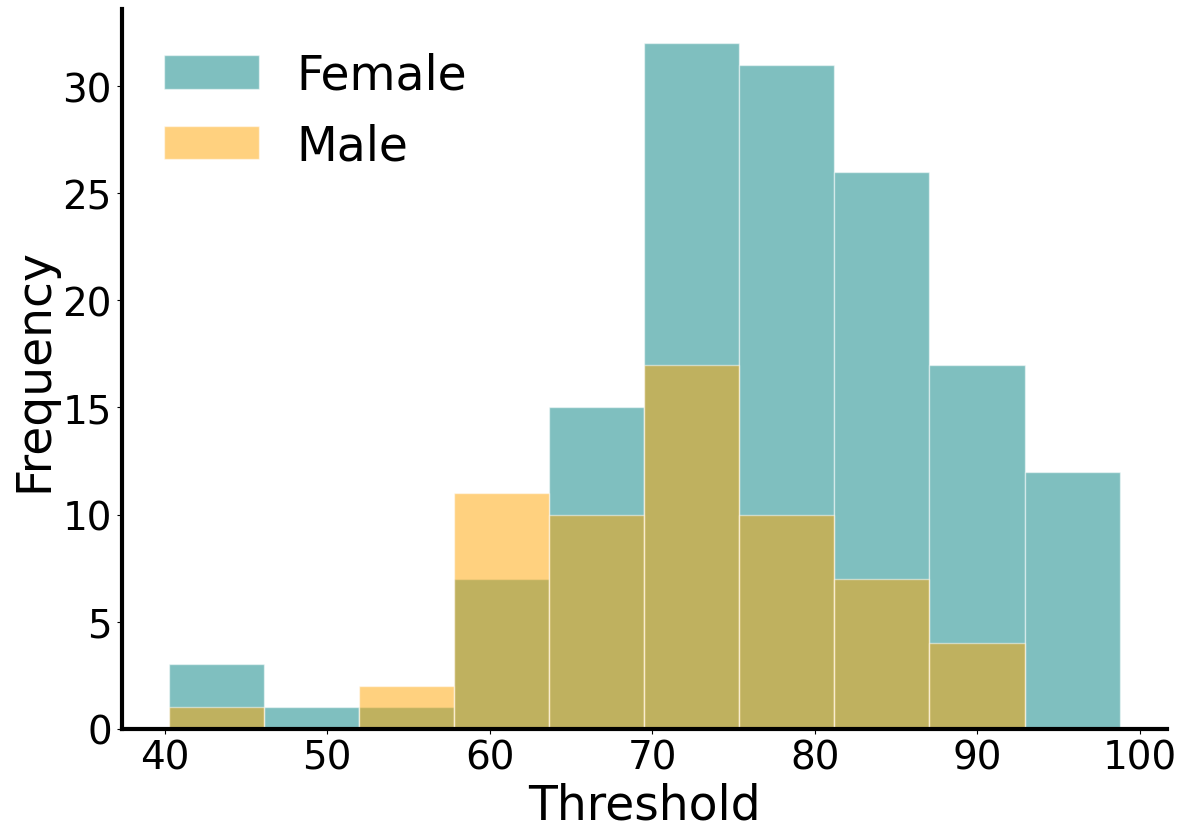

In [11]:
fig_filename = 'rrst_gender_control_thresh_hist_sup.png'
fig, ax = plt.subplots(figsize=(12, 8.5))

# Split the DataFrame by gender
df_female = rrst_subset_data[rrst_subset_data['gender'] == 1]
df_male = rrst_subset_data[rrst_subset_data['gender'] == 2]

# Determine the common range for bins
min_val = min(df_female['psi_thresh'].min(), df_male['psi_thresh'].min())
max_val = max(df_female['psi_thresh'].max(), df_male['psi_thresh'].max())

# Create the bin edges
bins = np.linspace(min_val, max_val, 11)  # 10 bins

# Create the histograms for both genders using the same bins
plt.hist(df_female['psi_thresh'], bins=bins, color='teal', edgecolor='white', alpha=0.5, label='Female')
plt.hist(df_male['psi_thresh'], bins=bins, color='orange', edgecolor='white', alpha=0.5, label='Male')

# Set labels and ticks
plt.xlabel('Threshold', fontsize=fontsize_axis_labels)
plt.ylabel('Frequency', fontsize=fontsize_axis_labels)
plt.xticks(fontsize=fontsize_axis_ticks)
plt.yticks(fontsize=fontsize_axis_ticks)

# Remove frame
ax = plt.gca()  
ax.grid(False)


# Increase the thickness of the axis
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(3.0)
    ax.spines[axis].set_color('black')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend to distinguish between the two histograms
plt.legend(fontsize=fontsize_axis_labels, frameon=False)

# Adjust layout to prevent clipping at the bottom
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the bottom margin as needed (0.95 leaves 5% space at the bottom)

if flag_savefigs:
    # Save the figure with a specified size and resolution
    fig_filepath = f'{figures_dir}{fig_filename}'
    plt.savefig(fig_filepath, dpi=300)
    
# Show the plot
plt.show()

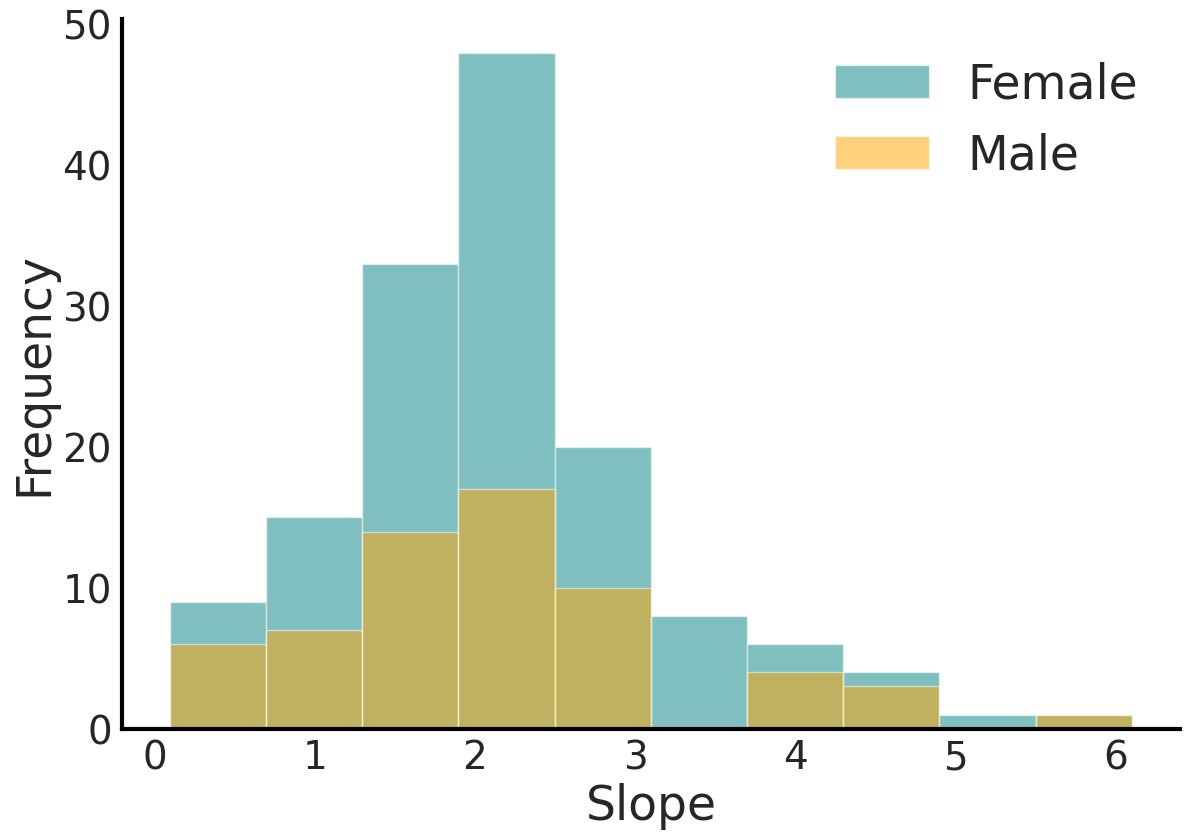

In [49]:
fig_filename = 'rrst_gender_control_slope_hist_sup.png'
fig, ax = plt.subplots(figsize=(12, 8.5))


# Determine the common range for bins
min_val = min(df_female['psi_slope'].min(), df_male['psi_slope'].min())
max_val = max(df_female['psi_slope'].max(), df_male['psi_slope'].max())

# Create the bin edges
bins = np.linspace(min_val, max_val, 11)  # 10 bins

# Create the histograms for both genders using the same bins
plt.hist(df_female['psi_slope'], bins=bins, color='teal', edgecolor='white', alpha=0.5, label='Female')
plt.hist(df_male['psi_slope'], bins=bins, color='orange', edgecolor='white', alpha=0.5, label='Male')

# Set labels and ticks
plt.xlabel('Slope', fontsize=fontsize_axis_labels)
plt.ylabel('Frequency', fontsize=fontsize_axis_labels)
plt.xticks(fontsize=fontsize_axis_ticks)
plt.yticks(fontsize=fontsize_axis_ticks)

# Remove frame
ax = plt.gca()  
ax.grid(False)


# Increase the thickness of the axis
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(3.0)
    ax.spines[axis].set_color('black')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend to distinguish between the two histograms
plt.legend(fontsize=fontsize_axis_labels, frameon=False)

# Adjust layout to prevent clipping at the bottom
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the bottom margin as needed (0.95 leaves 5% space at the bottom)

if flag_savefigs:
    # Save the figure with a specified size and resolution
    fig_filepath = f'{figures_dir}{fig_filename}'
    plt.savefig(fig_filepath, dpi=300)
    
# Show the plot
plt.show()

## Gender analysis box plot


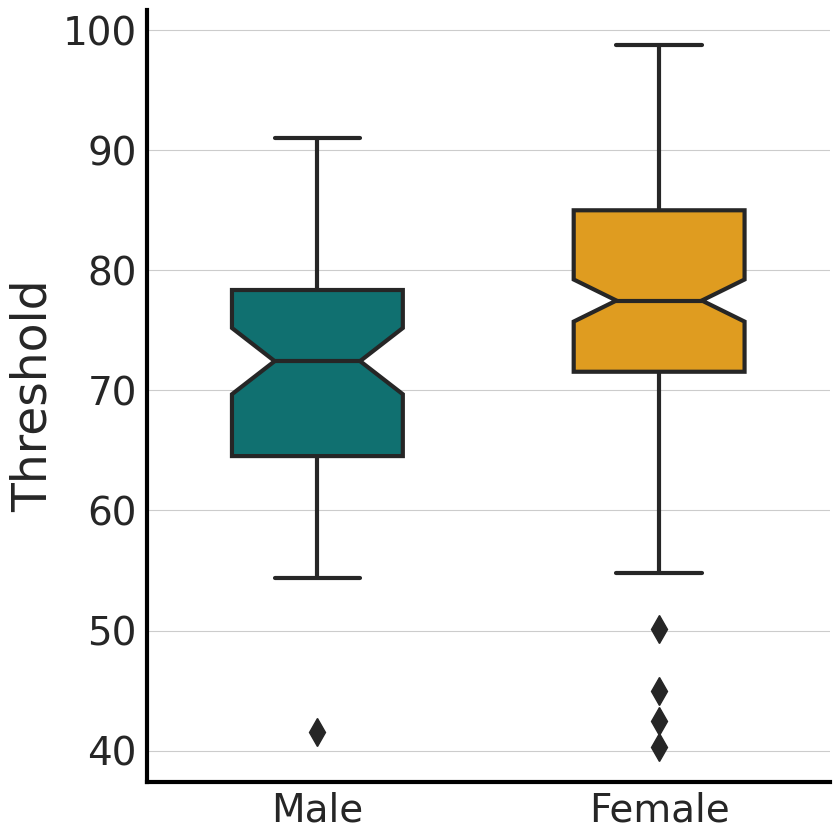

In [29]:
fig_filename = 'rrst_gender_control_thresh_box.png'

# Rename the variables for the x-axis labels
variable_names = ['Male', 'Female']

# Define custom colors
custom_colors = ['teal', 'orange']

# Set the style
sns.set_style("whitegrid")

# Create a box plot with Seaborn
plt.figure(figsize=(8.5, 8.5))
ax = sns.boxplot(data=[df_male['psi_thresh'],df_female['psi_thresh'],],
            width=0.5, linewidth=3, notch=True, fliersize=14, palette=custom_colors) 

# Rename the x-axis labels
ax.set_xticklabels(variable_names, fontsize=fontsize_axis_labels)

# Set labels and title
plt.ylabel('Threshold', fontsize=fontsize_axis_labels)

# Set tick label size
plt.xticks(fontsize=fontsize_axis_ticks)
plt.yticks(fontsize=fontsize_axis_ticks)

# Customizing the axes
for _, spine in ax.spines.items():
    spine.set_linewidth(3)
    spine.set_color('black')

# Removing right and top sides
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

if flag_savefigs:
    # Save the figure with a specified size and resolution
    fig_filepath = f'{figures_dir}{fig_filename}'
    plt.savefig(fig_filepath, dpi=300)
    
# Show plot
plt.tight_layout()
plt.show()

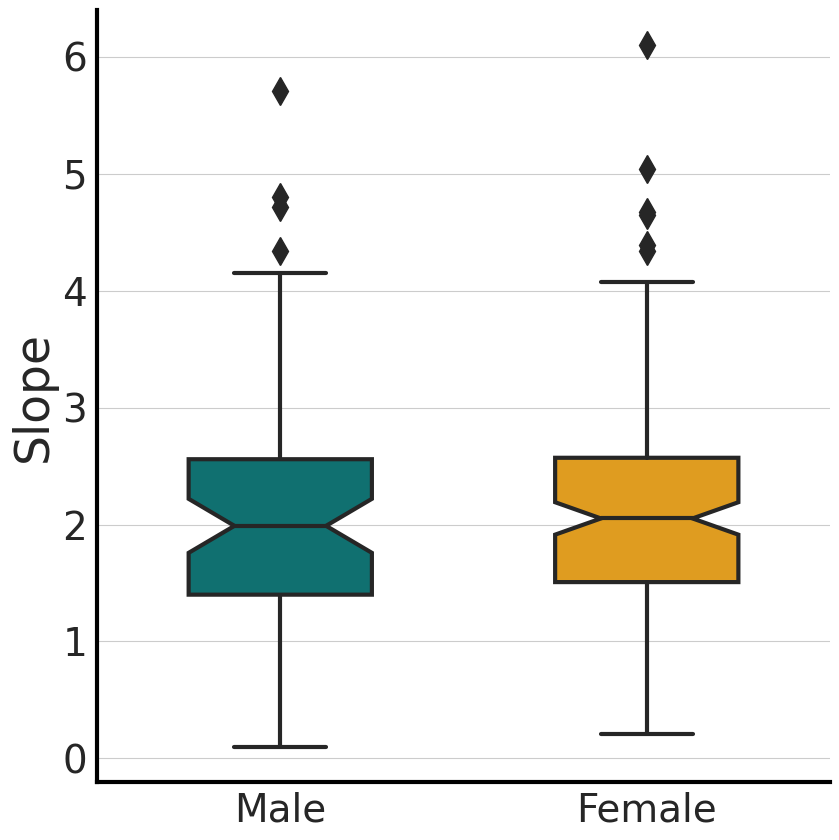

In [41]:
fig_filename = 'rrst_gender_control_slope_box.png'

# Rename the variables for the x-axis labels
variable_names = ['Male', 'Female']

# Define custom colors
custom_colors = ['teal', 'orange']

# Set the style
sns.set_style("whitegrid")

# Create a box plot with Seaborn
plt.figure(figsize=(8.5, 8.5))
ax = sns.boxplot(data=[df_male['psi_slope'], df_female['psi_slope']],
                 width=0.5, linewidth=3, notch=True, fliersize=14, palette=custom_colors)

# Rename the x-axis labels
ax.set_xticklabels(variable_names, fontsize=fontsize_axis_labels)

# Set labels and title
plt.ylabel('Slope', fontsize=fontsize_axis_labels)

# Set tick label size
plt.xticks(fontsize=fontsize_axis_ticks)
plt.yticks(fontsize=fontsize_axis_ticks)

# Customizing the axes
for _, spine in ax.spines.items():
    spine.set_linewidth(3)  
    spine.set_color('black')

# Removing right and top sides
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Adjust layout to prevent clipping
plt.tight_layout()

if flag_savefigs:
    # Save the figure with a specified size and resolution
    fig_filepath = f'{figures_dir}{fig_filename}'
    plt.savefig(fig_filepath, dpi=300)

# Show plot
plt.show()

In [12]:
# Threshold
# Combine the data into a single DataFrame for easier analysis
df_combined = pd.DataFrame({
    'Male': df_male['psi_thresh'],
    'Female': df_female['psi_thresh']
})

# Calculate basic statistics
stats = df_combined.agg(['count', 'mean', 'std', 'min', 'max', 'median'])

# Calculate additional statistics
stats.loc['q1'] = df_combined.quantile(0.25)
stats.loc['q3'] = df_combined.quantile(0.75)
stats.loc['iqr'] = stats.loc['q3'] - stats.loc['q1']

# Print the statistics
print(stats)

             Male      Female
count   62.000000  145.000000
mean    71.681736   77.741351
std      9.705327   10.877371
min     41.519412   40.285882
max     91.039412   98.748235
median  72.433824   77.478235
q1      64.526324   71.548824
q3      78.355588   84.992941
iqr     13.829265   13.444118


In [16]:
# Unpleasantness
# Combine the data into a single DataFrame for easier analysis
df_combined = pd.DataFrame({
    'Male': df_male['meanDispRating'],
    'Female': df_female['meanDispRating']
})

# Calculate basic statistics
stats = df_combined.agg(['count', 'mean', 'std', 'min', 'max', 'median'])

# Calculate additional statistics
stats.loc['q1'] = df_combined.quantile(0.25)
stats.loc['q3'] = df_combined.quantile(0.75)
stats.loc['iqr'] = stats.loc['q3'] - stats.loc['q1']

# Print the statistics
print(stats)

             Male      Female
count   62.000000  145.000000
mean    23.902605   33.857416
std     21.509038   25.272414
min      0.000000    0.000000
max     75.446400   97.135400
median  17.317700   30.599000
q1       4.036500   10.788700
q3      38.770675   51.897300
iqr     34.734175   41.108600


In [17]:
# BMI
# Combine the data into a single DataFrame for easier analysis
df_combined = pd.DataFrame({
    'Male': df_male['bmi'],
    'Female': df_female['bmi']
})

# Calculate basic statistics
stats = df_combined.agg(['count', 'mean', 'std', 'min', 'max', 'median'])

# Calculate additional statistics
stats.loc['q1'] = df_combined.quantile(0.25)
stats.loc['q3'] = df_combined.quantile(0.75)
stats.loc['iqr'] = stats.loc['q3'] - stats.loc['q1']

# Print the statistics
print(stats)

             Male      Female
count   62.000000  145.000000
mean    23.147221   21.964398
std      2.575891    2.672944
min     18.827200   14.197500
max     29.802800   32.326500
median  23.019800   21.534900
q1      21.624525   20.195600
q3      24.495500   23.423600
iqr      2.870975    3.228000


## Simple analysis linking to behavioural measures

In [3]:
rrst_sticsa_wemwbs_fpath = '/mnt/fast_scratch/respiroFingerprint/data/rrst_subject_sticsa-wemwbs.csv'
rrst_sticsa_wemwbs = pd.read_csv(rrst_sticsa_wemwbs_fpath)

# Take a look at the columns
print(rrst_sticsa_wemwbs.columns)


Index(['id', 'psi_thresh', 'psi_slope', 'psi_acc', 'psi_breathless',
       'displeasure10', 'meanConf', 'aROC', 'meanDispRating', 'maia_notice',
       'maia_ndistract', 'maia_nworry', 'maia_attnReg', 'maia_EmoAware',
       'maia_SelfRef', 'maia_listen', 'maia_trust', 'sticsa_gm',
       'sticsa_gm_cog', 'sticsa_gm_som', 'wemwbs', 'amount_smoking',
       'breathe_nose_mouth', 'gender', 'age', 'bmi'],
      dtype='object')


In [35]:

# Rename columns
# Dictionary of old column names as keys and new column names as values
new_column_names = {
    'psi_thresh': 'threshold',
    'psi_slope': 'slope',
    'meanDispRating': 'displeasure',
    'meanConf': 'confBias'
}

# Rename the columns
rrst_sticsa_wemwbs.rename(columns=new_column_names, inplace=True)

# Selecting specific columns
selected_columns = ['threshold', 'slope', 'aROC', 'confBias', 'displeasure','maia_notice',
       'maia_ndistract', 'maia_nworry', 'maia_attnReg', 'maia_EmoAware',
       'maia_SelfRef', 'maia_listen', 'maia_trust', 
       'sticsa_gm_cog', 'sticsa_gm_som', 'wemwbs', 'gender', 'age', 'bmi']
corrplot_data = rrst_sticsa_wemwbs[selected_columns]



(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0, 0.5, 'threshold'),
  Text(0, 1.5, 'slope'),
  Text(0, 2.5, 'aROC'),
  Text(0, 3.5, 'confBias'),
  Text(0, 4.5, 'displeasure'),
  Text(0, 5.5, 'maia_notice'),
  Text(0, 6.5, 'maia_ndistract'),
  Text(0, 7.5, 'maia_nworry'),
  Text(0, 8.5, 'maia_attnReg'),
  Text(0, 9.5, 'maia_EmoAware'),
  Text(0, 10.5, 'maia_SelfRef'),
  Text(0, 11.5, 'maia_listen'),
  Text(0, 12.5, 'maia_trust'),
  Text(0, 13.5, 'sticsa_gm_cog'),
  Text(0, 14.5, 'sticsa_gm_som'),
  Text(0, 15.5, 'wemwbs'),
  Text(0, 16.5, 'gender'),
  Text(0, 17.5, 'age'),
  Text(0, 18.5, 'bmi')])

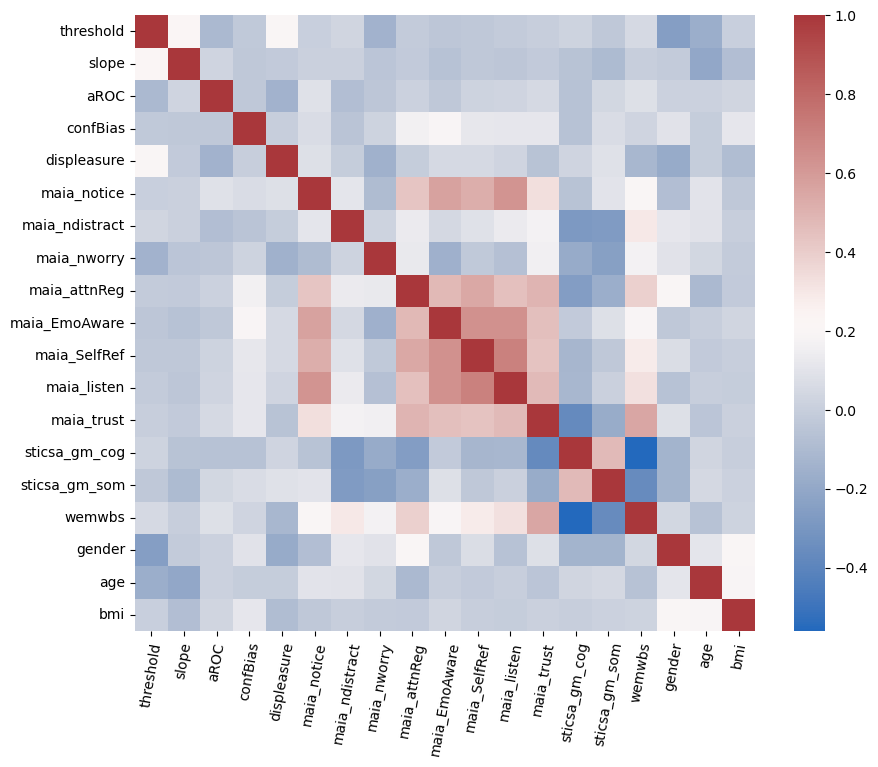

In [36]:
# Compute pairwise correlation of columns
corr_matrix_all = corrplot_data.corr()
# Define custom colormap to reverse the colors
cmap = sns.color_palette("Spectral", as_cmap=True).reversed()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix_all, cmap="vlag", annot=False, xticklabels=True, yticklabels=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=80)

# Ensure all y-axis labels are shown
plt.yticks(rotation=0, fontsize=10)  # Adjust fontsize as needed


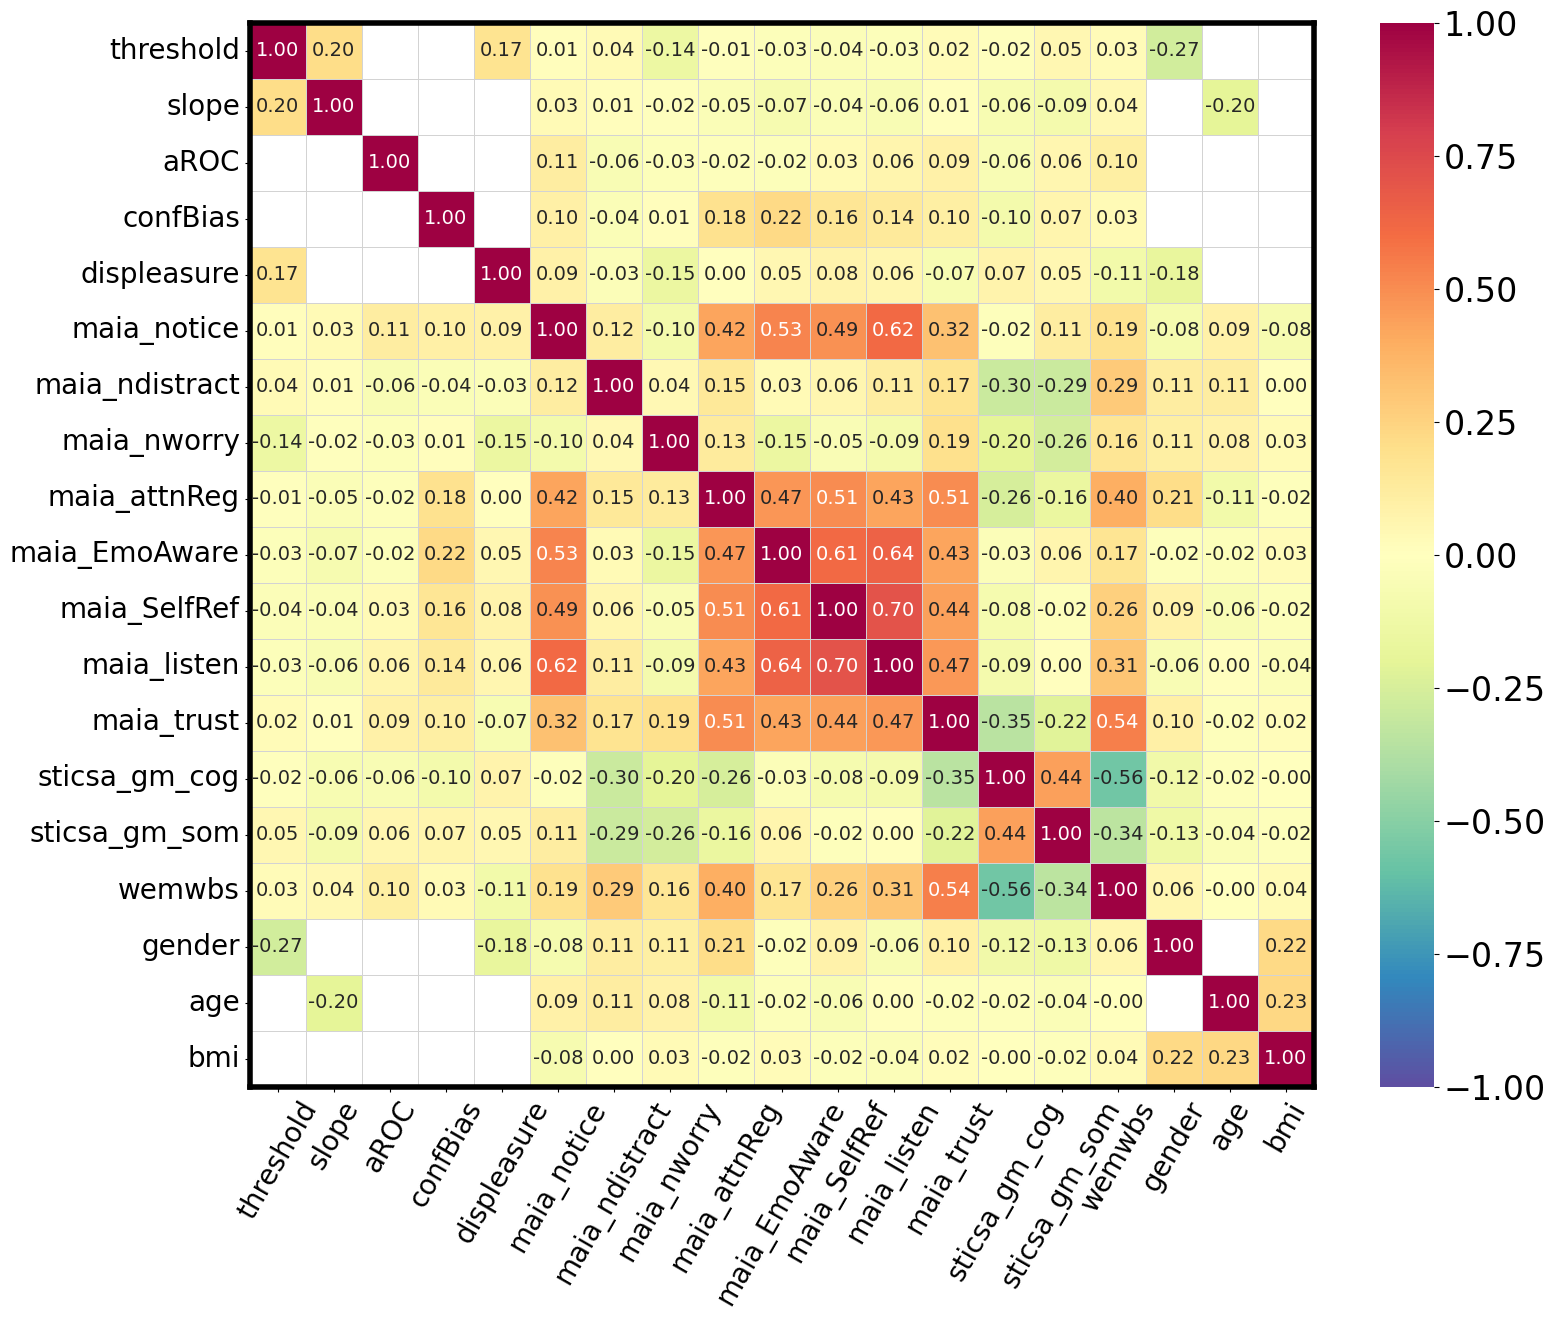

In [47]:
fig_filename = 'rrst_mentalHealth_correlation.png'


# Step 1: Calculate the correlation matrix and the corresponding p-value matrix
corr_matrix = corrplot_data.corr(method='spearman')
p_values = np.zeros(corr_matrix.shape)

for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if i != j:
            _, p = spearmanr(corrplot_data.iloc[:, i], corrplot_data.iloc[:, j])
            p_values[i, j] = p
        else:
            p_values[i, j] = np.nan

# Step 2: Flatten the matrix and apply FDR correction
flat_p_values = p_values.flatten()
flat_p_values = flat_p_values[~np.isnan(flat_p_values)]  # Remove NaN values
_, pvals_corrected, _, _ = multipletests(flat_p_values, method='fdr_bh')

# Step 3: Reconstruct the corrected p-value matrix
corrected_p_value_matrix = np.full_like(p_values, np.nan)
non_nan_indices = ~np.isnan(p_values)
corrected_p_value_matrix[non_nan_indices] = pvals_corrected

# Step 4: Apply the FDR correction to the correlation matrix
significance_level = 0.05
fdr_corrected_corr_matrix = corr_matrix.copy()
fdr_corrected_corr_matrix[corrected_p_value_matrix > significance_level] = np.nan

# create a mask to only show the lower correlation triangle
mask = np.triu(np.ones_like(fdr_corrected_corr_matrix, dtype=bool))

# Plotting the FDR Corrected Correlation Matrix
# Create figure and axes
fig, ax = plt.subplots(figsize=(16, 14))
# Define custom colormap to reverse the colors
cmap = sns.color_palette("Spectral", as_cmap=True).reversed()
heatmap = sns.heatmap(fdr_corrected_corr_matrix, fmt=".2f", cmap=cmap, annot=True, annot_kws={"size": fontsize_axis_ticks-14}, xticklabels=True, yticklabels=True, vmin=-1, vmax=1, linewidths=0.5, linecolor='lightgrey')


# Adjust the colorbar text size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=fontsize_axis_ticks-4)  # You can adjust the font size (16 is just an example)


# Adding a border around the heatmap
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(4)
    spine.set_edgecolor('black')  # You can change the color here

# rotate the x and y labels if they overlap
plt.xticks(rotation=60, fontsize=fontsize_axis_ticks-8)
plt.yticks(rotation=0, fontsize=fontsize_axis_ticks-8)

# Adjust layout to prevent clipping at the bottom
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the bottom margin as needed (0.95 leaves 5% space at the bottom)


if flag_savefigs:
    # Save the figure with a specified size and resolution
    fig_filepath = f'{figures_dir}{fig_filename}'
    plt.savefig(fig_filepath, dpi=600)

plt.show()


In [32]:
# Highlight significant correlations in the console output
print('\n Significant correlations:')
for i in range(fdr_corrected_corr_matrix.shape[0]):
    for j in range(i+1, fdr_corrected_corr_matrix.shape[0]):
        if abs(fdr_corrected_corr_matrix.iloc[i, j]) >= 0.05:
            print(f"{fdr_corrected_corr_matrix.columns[i]} and {fdr_corrected_corr_matrix.columns[j]}: {fdr_corrected_corr_matrix.iloc[i, j]}")


 Significant correlations:
id and maia_notice: -0.07359629365901695
id and maia_nworry: 0.05320764704098354
id and maia_EmoAware: -0.16905796913012916
id and maia_listen: -0.08450994576167117
id and sticsa_gm_som: -0.054950750408662014
id and age: -0.18928898673092737
threshold and slope: 0.2036656708986806
threshold and psi_acc: -0.6207521582015607
threshold and maia_nworry: -0.14137937371156
threshold and gender: -0.2730459965355063
slope and maia_EmoAware: -0.07063499101033417
slope and maia_listen: -0.06124416128684883
slope and sticsa_gm: -0.07762776014194717
slope and sticsa_gm_cog: -0.06376845402545911
slope and sticsa_gm_som: -0.09261901810074098
slope and age: -0.197457878083914
psi_acc and aROC: 0.32479638232543073
psi_acc and displeasure: -0.21294744073901675
psi_acc and maia_ndistract: -0.07270776217117353
psi_acc and maia_nworry: 0.0685759890654481
psi_acc and maia_attnReg: -0.05808570245997702
psi_acc and gender: 0.19113792161078527
psi_breathless and displeasure10: 0.46